# 23S1-AI6124 Fuzzy Membership Functions Assignment 3
Created by A/Prof Kai Keng ANG (kkang@i2r.a-star.edu.sg, kkang@ntu.edu.sg). Last modified 10 Oct 2023

Submitted by: Asvini Selvaraj Mat ID: G2303641A

# Instructions
Enter your name according to NTU Learn, and your student ID above. Do not include the square brackets. Please save the file as Fuzzy_membership_[Student name].ipynb and submit in NTU Learn.

There are 10 questions in this assignment. Some questions have multiple parts. Marks for each parts are indicated in the questions. Please read the question and hints carefully.


## Objective

After completing this tutorial assignment, you will know:

* What are the different types of membership functions
* How to use existing library to create and plot a fuzzy membership function
* How to approximate one type of membership function using another type
* How to relate python codes to equations of fuzzy membership functions
* How to implement and run the Learning Vector Quantization (LVQ) algorithm
* How to learn a set of winning vectors (or codebook vectors) using LVQ from a training data set.
* How to make predictions using the learned vectors.
* How to form fuzzy membership functions using the learned vectors.

## Introduction

First we install the Python Fuzzy Logic library

This library is based on Octave fuzzy-logic-toolkit of which is based on Matlab R2018b Fuzzy Logic Toolbox functions. However, not all the functions are working according to Matlab implmentation. There are also other toolboxes out there, such as scikit-fuzzy.

In [1]:
!pip install -U fuzzylab

Then we import the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fuzzylab as fz
from math import sqrt
from random import randrange
from random import seed

Most common fuzzy membership functions are triangular, trapezodal, Gaussian and bell-shaped.

# 1. Triangle  Membership Function

## Syntax

$y = \text{trimf$(x,[a, b, c])$}$

## Description

The triangular membership function of $x$ that depends on 3 parameters $a$, $b$, and $c$, as given by

$\begin{equation} f(x;a,b,c)= \begin{cases} (x - a)/(b - a), &\text{for $a < x < b$}\\ 1, &\text{for $x = b$}\\ (c - x)/(c - b), &\text{for $b < x < c$}\\ 0, &\text{otherwise.} \end{cases} \end{equation}$

$\text{whereby $a < b < c$}$

The parameters $a$ and $c$ define the “feet” of the triangle and the parameter $b$ defines the peak.

The following plots a triangular membership function with 3 parameters

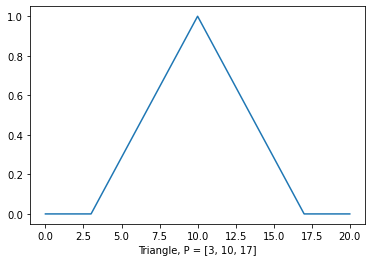

In [61]:
x = np.linspace(0, 20, 101)
y = fz.trimf(x, [3, 10, 17])
plt.plot(x, y)
plt.xlabel('Triangle, P = [3, 10, 17]')
plt.show()

# 2. Gaussian Membership Function

## Syntax

$y = \text{gaussmf$(x,[a, b])$}$

## Description

The Gaussian memebership function of $x$ that depends on 2 parameters $a$, $b$, as given by

$\begin{equation} f(x;a,b)= e^\frac{-(x-b)^2}{2a^2} \end{equation}$

The parameter $a$ defines the width or standard deviation and the parameter $b$ defines the centre or mean.


<font color='red'>Question 1(a)</font>: Create a Gaussian membership function similar to the above trianglular membership function centered at 10 using gaussmf. <font color='red'>(0.5 mark)</font>


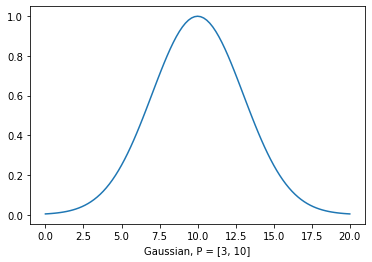

In [66]:
## Enter your code here for Question 1(a). Some codes are included for you. This code does not execute without modification
y = fz.gaussmf(x, [3, 10])
plt.plot(x, y)
plt.xlabel('Gaussian, P = [3, 10]')
plt.show()

# 3. Trapezoidal Membership Function

## Syntax

$y = \text{trapmf} (x,[a, b, c, d])$

## Description

The trapezoidal curve is a function of $x$ that depends on 4 parameters $a$, $b$, $c$, and $d$, as given by

$\begin{equation} f(x;a,b,c,d)= \begin{cases} (x - a)/(b - a), &\text{for $a < x < b$}\\ 1, &\text{for $b \leq x \leq c$}\\ (d - x)/(d - c), &\text{for $c < x < d$}\\ 0, &\text{otherwise.} \end{cases} \end{equation}$

$\text{with $a < b < c < d$}$

The parameters $a$ and $d$ define the “feet” of the trapezoid and the parameters $b$ and $c$ define the “shoulders.”


The following creates a trapezoodal membership function with 4 parameters

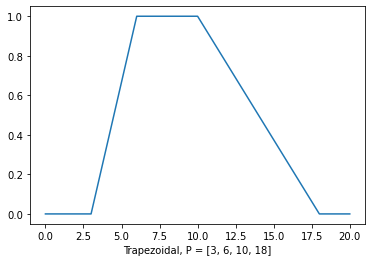

In [71]:
y = fz.trapmf(x, [3, 6, 10, 18])
plt.plot(x, y)
plt.xlabel('Trapezoidal, P = [3, 6, 10, 18]')
plt.show()

<font color='red'>Question 1(b)</font>: Use the function trapmf to plot a triangle membership function the same as section 1 above. <font color='red'>(0.5 mark)</font>

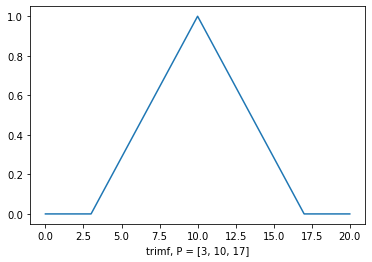

In [72]:
# Modify the code here for Question 1(b). The original code here is not correct
y = fz.trimf(x, [3, 10, 17])
plt.plot(x, y)
plt.xlabel('trimf, P = [3, 10, 17]')
plt.show()

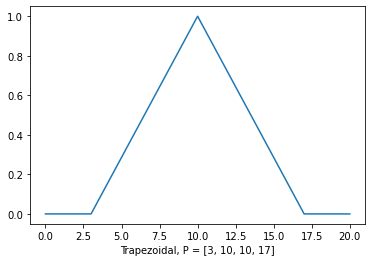

In [73]:
#1b Solution
y = fz.trapmf(x, [3, 10, 10, 17])
plt.plot(x, y)
plt.xlabel('Trapezoidal, P = [3, 10, 10, 17]')
plt.show()

# 4. Generalized Bell-shape Membership function

## Syntax

$y = \text{gbellmf} (x,[a, b, c])$

## Description

The generalized bell-shaped membership function of $x$ that depends on 3 parameters $a$, $b$ and $c$ as given by

$\begin{equation} f(x;a,b,c) = \frac{1}{1 + |\frac{x-c}{a}|^{2b}} \end{equation}$

- a controls the width of the bell.
- b controls the gradient of the bell's slopes.
- c controls the center value of the bell

<font color='red'>Question 2</font>: Give the code to plot a generalized bell-shape membership function similar to the above trapezoidal membership function in 3. You can refer to the code after question 3 for some hints on similar membership functions of different types. <font color='red'>(1 mark)</font>


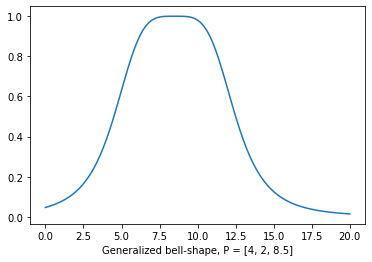

In [92]:
## Enter your code here for Question 2. Some codes are included for you. This code does not execute without modification
y = fz.gbellmf(x, [4, 2, 8.5])
plt.plot(x, y)
plt.xlabel('Generalized bell-shape, P = [4, 2, 8.5]')
plt.show()

# 5. Bell-shape Membership functions

## Syntax

$y = \text{bellmf} (x,[a, b, c, d])$

## Description

The generalized bell-shaped membership function of $x$ that depends on 4 parameters $a$, $b$, $c$ and $d$ as given by

$\begin{equation} f(x;a,b,c)= \begin{cases} \frac{1}{1+\left\lvert \frac{x-c}{a} \right\rvert ^{2b}}, &\text{for $x < c$} \\ \frac{1}{1+\left\lvert \frac{x-c}{a} \right\rvert ^{2d}}, &\text{for $x \geq c$} \end{cases} \end{equation}$

- a controls the width of the bell.
- b controls the gradient of the bell's left slope.
- <font color='blue'>c</font> controls the midpoint of the bell.
- d controls the gradient of the bell's right slope.

<font color='red'>Question 3</font>: bellmf function is not implemented in the Python Fuzzy Logic Library. Implement the function below. Hint: Look at gbellmf and trapmf implementation. Do not copy python code from elsewhere. <font color='red'>(1 mark)</font>

In [8]:
# Enter code for question 3 here
def bellmf(x, params):

    assert len(params) == 4, 'Generalized membership function must have four parameters.'
    a,b,c,d = params
    result = np.where(x < c, 1/(1 + (abs((x-c)/a)**(2*b))), 1/(1 + (abs((x-c)/a)**(2*d))))
    return result


Now that you implemented the bellmf, we can plot a generalized bell-shape membership function similar to the above trapezoidal membership function in section 3. We can also plot the trapezoidal membership function overlapped with the bell-shape membership function in the same graph. This plot serves as a hint to question 2.


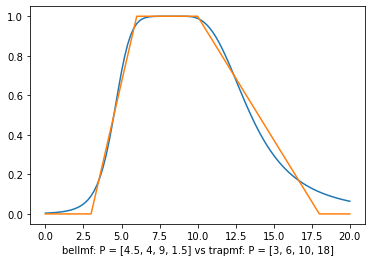

In [93]:
# This code will only run correctly if Question 3 above is answered correctly
y = bellmf(x, [4.5, 4, 9, 1.5])
plt.plot(x, y)
y = fz.trapmf(x, [3, 6, 10, 18])
plt.plot(x, y)
plt.xlabel('bellmf: P = [4.5, 4, 9, 1.5] vs trapmf: P = [3, 6, 10, 18]')
plt.show()

## 6. Storing Membership function type and parameters

We need a way to store the type of membership functions, the parameters, and a generic function to evaluate memership function. Unfortunately the fismf class in Python Fuzzy Logic library is not working well, probably coded for an older version of Python. So we have to fix the class definition.

In [95]:
# This class replaces the fismf function in the Python Fuzzy Logic Library.
# This way of coding is highly not recommended, as the attributes of the class is not defined.
class fismf(object):
    def __init__(self, **attrs):
        self.__dict__.update(**attrs)
    def __getattr__(self, attr):
        return self.__dict__.get(attr, None)

The following code initializes a trapezoidal membership function with parameters, and plots it.

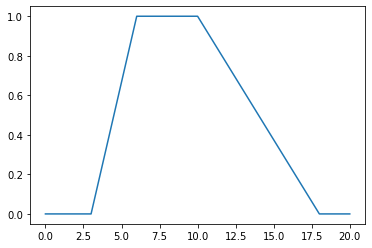

In [96]:
mymf = fismf(Type = 'trapmf', Parameters = [3, 6, 10, 18])
plt.plot(x, fz.evalmf.evalmf(mymf, x))

<font color='red'>Question 4(a)</font>: Given a value z=4, find the Fuzzy Membership function value from mymf. <font color='red'>(0.5 mark)</font>

In [97]:
# Enter Code for Question 4(a) here. Code does not run without modification
z = 4
uz = fz.evalmf.evalmf(mymf, z)
print(uz)

[0.33333333]


<font color='red'>Question 4(b)</font>: Now change mf to another type of membership function with different parameters and plot the membership function. <font color='red'>(0.5 mark)</font>

[0.14285714]


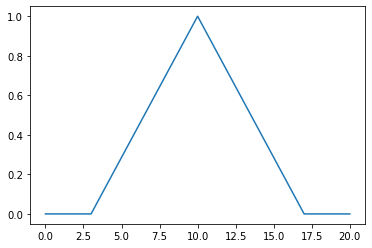

In [98]:
# Enter code for question 4(b) here. No code provided for you
mymf = fismf(Type = 'trimf', Parameters = [3, 10, 17])
plt.plot(x, fz.evalmf.evalmf(mymf, x))
z = 4
uz = fz.evalmf.evalmf(mymf, z)
print(uz)

## 7. Learning Vector Quantization (LVQ) algorithm

The Learning Vector Quantization (LVQ) algorithm is a lot like k-Nearest Neighbors. k-Nearest Neighbors need to keep a large database of training examples in order to make predictions. The LVQ  algorithm addresses uses a much smaller subset of patterns to represent the training data. These are called codebooks. We need to compute distances between the codebooks and the examples.

Thus we needed is a function to calculate the distance between two samples or rows in a dataset.

Rows of data are mostly made up of numbers and an easy way to calculate the distance between two rows or vectors of numbers is using the Euclidean distance measure.

The equation of Euclidean distance between vectors *x* and *y* with length *n* is defined as

\begin{equation*}
\sqrt{\sum_{k=1}^n (x_k - y_k)^2}
\end{equation*}

In other words, Euclidean distance is the square root of the sum of the squared differences between the two vectors.


In [14]:
# A function to calculate the Euclidean distance between two vectors
def euclidean_distance2(x1, x2):
    dist = 0.0
    for i in range(len(x1)-1):
        dist = dist + (x1[i] - x2[i])**2
    return sqrt(dist)

# A more effective way
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

Now create some dataset to look at euclidean distance

Sample 1: [-0.00566939 -0.12003061]
Sample 2: [2.54640505 1.49156368]
Sample 11: [-1.50109281 -0.93110408]
Sample 12: [-1.95734458 -2.46650992]


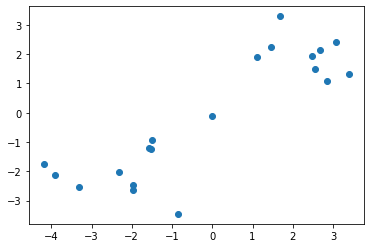

In [21]:
dataset = np.random.randn(20,2)
dataset[1:10]+=(+2)
dataset[10:20]+=(-2)
print("Sample 1:",dataset[0])
print("Sample 2:",dataset[1])
print("Sample 11:",dataset[10])
print("Sample 12:",dataset[11])
plt.scatter(dataset[:,0], dataset[:,1])

Compute the euclidean distance between Sample 1 and Sample 2

In [22]:
dist1 = euclidean_distance2(dataset[0],dataset[1])
print("Distance 1:",dist1)

Distance 1: 2.5520744386103007


In [23]:
dist2 = euclidean_distance(dataset[0],dataset[1])
print("Distance 2:",dist2)

Distance 2: 3.0183306789540425


<font color='red'>Question 5(a)</font>: The results are not the same. Which function: euclidean_distance or euclidean_distance2 is wrong? Fix the function that is wrong below. <font color='red'>(0.5 mark)</font>

In [24]:
# Enter code for question 6 here
#Solution : The function Euclidean_distance_2 is wrong as it doesnt loop through the entire dataset 
#due to the reason (len(x1)-1)
def euclidean_distance2(x1, x2):
    dist = 0.0
    for i in range(len(x1)):
        dist = dist + (x1[i] - x2[i])**2
    return sqrt(dist)

dist = euclidean_distance2(dataset[0],dataset[1])
print("Distance 1:",dist)

Distance 1: 3.0183306789540425


## 8. Find the Winner
The Winner weight, or so called the winning codebook, also called Best Matching Vector, is the weight or codebook that is most similar to a new piece of data.

To identify the Winner for a new piece of data within a dataset we must first calculate the distance between each weight or codebook to the new piece of data. We can do this using our distance function above.

Once distances are calculated, we must sort all of the weights or codebooks by their distance to the new data. We can then return most similar weight or codebook vector with the smallest distance to the new data.

We can do this by keeping track of the distance for each record in the dataset as a tuple, sort the list of tuples by the distance (in descending order) and then retrieve the winner.

Below is a function named get_best_matching_unit() that implements this.

In [25]:
# Locate the best matching unit
def find_winner(weights, test_sample):
    distances = list()
    for weight_index, weight in enumerate(weights):
        dist = euclidean_distance(weight, test_sample)
        distances.append((weight_index, dist))
    distances.sort(key=lambda tuple: tuple[1])
    return distances[0][0]

The euclidean_distance() function in section 1 is used to calculate the distance between each weight or codebook with the new test_sample.

The list of codebook vectors and distance tuples is sorted where a custom key is used ensuring that the second item in the tuple (tuple[1]) is used in the sorting operation.

Finally, the most similar weight or codebook vector is returned as the winner.

We can test this function with the small dataset prepared in section 1.

In [26]:
winner=find_winner([dataset[i] for i in [0,10]],dataset[0])
print("Winner :",winner)
winner=find_winner([dataset[i] for i in [0,10]],dataset[10])
print("Winner :",winner)

Winner : 0
Winner : 1


<font color='red'>Question 5(b)</font>: How many weights or codebooks were passed to the function find_winner? <font color='red'>(0.25 mark)</font>

Enter answer to Question 5(b) here.
Two codebooks (weights) were passed to the function find_winner -dataset[0] and dataset [10]

<font color='red'>Question 5(c)</font>: How many test samples were passed to the function find_winner? <font color='red'>(0.25 mark)</font>

Enter answer to Question 5(c) here.
One test sample (the second argument, i.e., dataset[0] and dataset[10]) was passed to the function find_winner.

## 9. Initialize LVQ Weight Vectors

Before we train a set of weights or codebook vectors, we have to initialize the weights.

We can initialize it with patterns constructed from random features in the training dataset. This is one way to initialize it. Another way is to randomize the weights to a certain range of the input dataset instead of using one of the samples. There are advantages and disadvantages to different ways of initializing the weights.

Below is a function named random_weight() that picks a random sample from the training data.

In [27]:
# Assign a random codebook vector from the training data
def random_weight(traindata):
    n_records = len(traindata)
    weight = traindata[randrange(n_records)]
    return weight

We can test this function with the small dataset prepared in section 1.

In [28]:
weight=random_weight(dataset)

print("Weight:",weight)

Weight: [2.47431434 1.94693206]


In [29]:
# Print the datasets 
for i in range(len(dataset)):
    print(f'dataset {i}:{dataset[i]}')

dataset 0:[-0.00566939 -0.12003061]
dataset 1:[2.54640505 1.49156368]
dataset 2:[3.38488557 1.32492041]
dataset 3:[2.86108713 1.08659367]
dataset 4:[2.68372652 2.16105044]
dataset 5:[3.06683428 2.42869399]
dataset 6:[1.10628986 1.91528725]
dataset 7:[2.47431434 1.94693206]
dataset 8:[1.45160418 2.2353513 ]
dataset 9:[1.67468359 3.29747156]
dataset 10:[-1.50109281 -0.93110408]
dataset 11:[-1.95734458 -2.46650992]
dataset 12:[-3.89692131 -2.12955241]
dataset 13:[-1.53314828 -1.25327108]
dataset 14:[-2.3213875  -2.02685627]
dataset 15:[-1.58145332 -1.21856044]
dataset 16:[-4.17584436 -1.73792642]
dataset 17:[-0.84082143 -3.45594934]
dataset 18:[-3.30559263 -2.53066367]
dataset 19:[-1.98128027 -2.64617786]


In [30]:
## For question 6(a)
import numpy as np

# Given random weights
random_weights = weight

# Calculate the squared Euclidean distance between the random_weights and all datasets
distances = np.sum((dataset - random_weights) ** 2, axis=1)

# Find the index of the dataset with the smallest distance
selected_sample_index = np.argmin(distances)

# Print the index of the selected sample
print(f"The selected sample is at index {selected_sample_index}: {dataset[selected_sample_index]}")

The selected sample is at index 7: [2.47431434 1.94693206]


<font color='red'>Question 6(a)</font>: Which sample is selected as the weight? Give the index of the sample selected. <font color='red'>(0.5 mark)</font>

Enter answer to Question 6(a) here. The selected sample is at index 18: [-3.30559263 -2.53066367]

<font color='red'>Question 6(b)</font>: If you run again, what happens? <font color='red'>(0.5 mark)</font>

Enter answer to Question 6(b) here. When i executed the weight code again, it generated a new number as the weight takes in random weight from the dataset. Now the weight taken is [2.47431434 1.94693206] at index 7

## 10. Training LVQ Weight Vectors

After the weights are initialized to a random set, they have to be trained using the training data. This is done iteratively.

The training process is repeated for a fixed number of epochs, or so called exposures of the training data. In an epoch, each training sample is used to update the set of weight or codebook vectors.

For a training pattern, a winner vector is updated to move it closer or further away. A winner is found for each training pattern and only this winner is updated. The difference between the training pattern and the winner is calculated as the error.

The amount that the winner is adjusted is controlled by a learning rate. This is the amount of change made to the winner. For example, a learning rate of 0.3 means that the winner are only moved by 30% of the error or difference between the training data and the winner.

The learning rate is also adjusted so that it has maximum effect in the first epoch and the effect lessen as training continues until it has a minimal effect in the final epoch. This is called a linear decay learning rate commonly used in artificial neural networks.

Below is a function named train_weights() that implements the procedure for training a set of weight vectors given a training dataset.

The function takes 3 additional arguments to the training dataset, the number of weights or codebook vectors to create and train, the initial learning rate and the number of epochs.

The function keeps track of the sum squared error each epoch and prints a message showing the epoch number, effective learning rate and sum squared error score. This is helpful when debugging the training function or the specific configuration for a given prediction problem. The random_weight function is used to initialize the codebook vectors and the find_winner function is used to find the winner for each training pattern within an epoch.


In [31]:
# Train a set of codebook vectors
def train_LVQ(traindata, weights, lrate, epochs):
    print("Weights:",weights)
    for epoch in range(epochs):
        rate = lrate * (1.0-(epoch/float(epochs)))
        sum_error = 0.0
        for row in traindata:
            winner_index = find_winner(weights, row)
            #print("Winner:",winner)
            error = (row - weights[winner_index])
            sum_error = sum_error + sqrt(sum(error**2))
            # This line has an error in changing the original dataset
            # weights[winner_index] += rate * error
            weights[winner_index] = weights[winner_index] + rate * error
            #print("Winner:",winner)
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, rate, sum_error))
    return weights


Run this to train a set of 2 weight vectors for 20 epochs with an initial learning rate of 0.3. The details are printed each epoch and the set of 2 codebook vectors learned from the training data is displayed.

We can see that the changes to learning rate meet our expectations explored above for each epoch. We can also see that the sum squared error each epoch does continue to drop at the end of training and that there may be an opportunity to tune the example further to achieve less error

Initial weights: [array([-1.53314828, -1.25327108]), array([-1.98128027, -2.64617786])]
Weights: [array([-1.53314828, -1.25327108]), array([-1.98128027, -2.64617786])]
>epoch=0, lrate=0.300, error=33.108
>epoch=1, lrate=0.270, error=25.658
>epoch=2, lrate=0.240, error=25.360
>epoch=3, lrate=0.210, error=25.083
>epoch=4, lrate=0.180, error=24.798
>epoch=5, lrate=0.150, error=24.500
>epoch=6, lrate=0.120, error=24.191
>epoch=7, lrate=0.090, error=23.883
>epoch=8, lrate=0.060, error=23.567
>epoch=9, lrate=0.030, error=23.234
Weights: [array([2.10345706, 1.9259503 ]), array([-2.32620984, -2.12608123])]


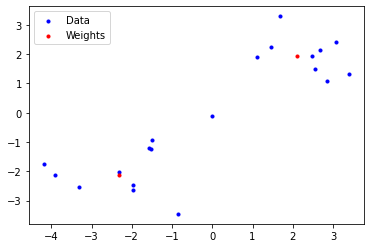

In [32]:
n_weights = 2
weights = [random_weight(dataset) for i in range(n_weights)]
seed(1)
learn_rate = 0.3
n_epochs = 10
print("Initial weights:",weights)
weights = train_LVQ(dataset, weights, learn_rate, n_epochs)
print("Weights:",weights)
nweights=np.array(weights)
area = np.pi*3
plt.scatter(dataset[:,0], dataset[:,1],area,c="blue",label="Data")
plt.scatter(nweights[:,0], nweights[:,1],area,c="red",label="Weights")
plt.legend(loc=2)
plt.show()

Now what happens if we change the random initialization of weights

Initial weights: [array([-0.00566939, -0.12003061]), array([2.54640505, 1.49156368])]
Weights: [array([-0.00566939, -0.12003061]), array([2.54640505, 1.49156368])]
>epoch=0, lrate=0.300, error=23.275
>epoch=1, lrate=0.270, error=24.752
>epoch=2, lrate=0.240, error=25.328
>epoch=3, lrate=0.210, error=25.080
>epoch=4, lrate=0.180, error=24.797
>epoch=5, lrate=0.150, error=24.500
>epoch=6, lrate=0.120, error=24.191
>epoch=7, lrate=0.090, error=23.883
>epoch=8, lrate=0.060, error=23.567
>epoch=9, lrate=0.030, error=23.234
Weights: [array([-2.32620963, -2.12608102]), array([2.10345733, 1.92595061])]


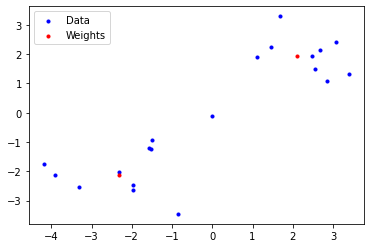

In [33]:
weights = [dataset[i] for i in [0,1]]
print("Initial weights:",weights)
weights = train_LVQ(dataset, weights, learn_rate, n_epochs)
print("Weights:",weights)
nweights=np.array(weights)
area = np.pi*3
plt.scatter(dataset[:,0], dataset[:,1],area,c="blue",label="Data")
plt.scatter(nweights[:,0], nweights[:,1],area,c="red",label="Weights")
plt.legend(loc=2)
plt.show()

<font color='red'>Question 7(a)</font>: What does the initialization of weights impact the LVQ algorithm? <font color='red'>(0.5 mark)</font>

Enter answer to Question 7(a) here

The first set of "weights" can be thought of as the "center" of the training neighborhoods. There will be less error at the start if the starting weights clearly divide the neighborhoods. This means that it will take fewer epochs to find the final weights. But if the starting weights are chosen very close to each other and to the corner of the map, the initial error will be very high, and it will take more epochs to find the final weights. If there aren't enough epochs, the final weights might not converge at all.

<font color='red'>Question 7(b)</font>: What other parameters also affect the LVQ algorithm? Show with code. <font color='red'>(0.5 mark)</font>

Enter answer to Question 7(b) here

In addition to the initialization of weights, there are several other parameters that can affect the performance of the LVQ algorithm. These parameters include the learning rate, the number of prototypes, the neighborhood size, and the stopping criteria.

The learning rate determines the step size at which the prototypes are adjusted during the learning process. A higher learning rate can lead to faster convergence but may also result in overshooting and instability, while a lower learning rate can lead to slower convergence but more stable results.

The number of prototypes refers to the number of representative vectors used to classify the input data. Increasing the number of prototypes can improve the accuracy of the algorithm but may also increase computational complexity.


The neighborhood size determines the influence of neighboring prototypes during the learning process. A larger neighborhood size allows for more prototypes to contribute to the classification decision, potentially improving the algorithm's ability to handle complex data distributions.


The stopping criteria determine when the learning process should be terminated. This can be based on a predefined number of iterations or when a certain level of accuracy is achieved. Choosing appropriate stopping criteria is important to prevent overfitting or underfitting of the data.


It is worth noting that the impact of these parameters can vary depending on the specific problem and dataset. Therefore, it is important to carefully tune these parameters to achieve optimal performance for a given task.


Initial weights: [array([-0.00566939, -0.12003061]), array([2.54640505, 1.49156368])]
Weights: [array([-0.00566939, -0.12003061]), array([2.54640505, 1.49156368])]
>epoch=0, lrate=0.100, error=30.136
>epoch=1, lrate=0.090, error=22.984
>epoch=2, lrate=0.080, error=22.873
>epoch=3, lrate=0.070, error=22.882
>epoch=4, lrate=0.060, error=22.844
>epoch=5, lrate=0.050, error=22.779
>epoch=6, lrate=0.040, error=22.701
>epoch=7, lrate=0.030, error=22.616
>epoch=8, lrate=0.020, error=22.530
>epoch=9, lrate=0.010, error=22.442
Weights: [array([-2.14272489, -1.93529099]), array([2.30710455, 2.03883938])]


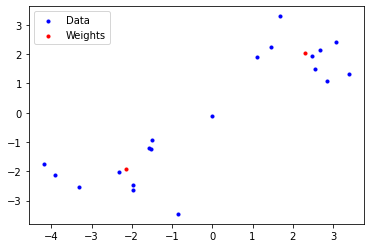

In [55]:
# Enter code for Question 7(b) here
# Modifying only the Learningrate.
learn_rate = 0.1
weights = [dataset[i] for i in [0,1]]
print("Initial weights:",weights)
n_epochs =10
weights = train_LVQ(dataset, weights, learn_rate, n_epochs)
print("Weights:",weights)
nweights=np.array(weights)
area = np.pi*3
plt.scatter(dataset[:,0], dataset[:,1],area,c="blue",label="Data")
plt.scatter(nweights[:,0], nweights[:,1],area,c="red",label="Weights")
plt.legend(loc=2)
plt.show()

from the above result we can see that the change in learning rate value has an improving result in reduction of error with 10 epochs as compared to Learning rate at 0.3
  

## 11. Generating Fuzzy Membership functions using LVQ algorithm

In the example above, there are 2 winning vectors, each vector has 2 dimensions. This can be view as 2 inputs with 2 membership functions each.


<font color='red'>Question 8</font>: Use the winning vectors to generate triangle fuzzy membership functions for dimension 1. Plot the 2 membership functions, one for each winning vector on the same plot using different colors. <font color='red'>(1 mark)</font>

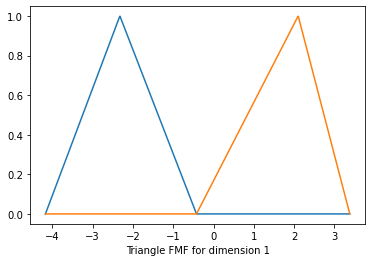

In [34]:
# Enter code for Question 8 here
# get range to plot
d1_max = np.max(dataset[:,0])
d1_min = np.min(dataset[:,0])
x = np.linspace(d1_min, d1_max, 1001)

# sort nweights by d1 for order
nweights = nweights[nweights[:, 0].argsort()]

# initialize a and c
a = np.zeros((len(b),1))
c = np.zeros((len(b),1))

# get center of triangular fmf from nweights
b = np.sort(nweights[:,0])

# get median value of dataset
d1_med = np.median(dataset[:,0])

# set a[0]- Dataset minimum value
# c[0],a[1]- Dataset median value
# c[1]- Dataset maximum value
a[0] = d1_min
c[0] = d1_med
a[1] = d1_med
c[1] = d1_max

# plot triangular FMF
fmf_1 = fz.trimf(x, [a[0], b[0], c[0]])
fmf_2 = fz.trimf(x, [a[1], b[1], c[1]])
plt.plot(x, fmf_1)
plt.plot(x, fmf_2)
plt.xlabel('Triangle FMF for Dimension 1')
plt.show()

<font color='red'>Question 9</font>: Use the winning vectors to generate Gaussian membership functions for dimension 2. Plot the 2 membership functions, one for each winning vector on the same plot using different colors. <font color='red'>(1 mark)</font>

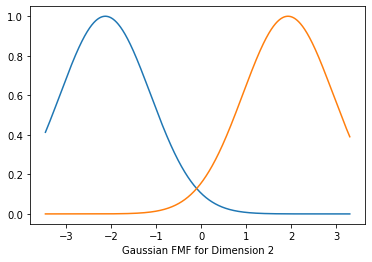

In [35]:
# Enter code for Question 9 here
# get range to plot
d2_max = np.max(dataset[:,1])
d2_min = np.min(dataset[:,1])
x = np.linspace(d2_min, d2_max, 1001)

# sort nweights by d2 for order
nweights = nweights[nweights[:, 1].argsort()]

# get center of triangular fmf from nweights and set width
b = nweights[:,1]
width = 1

# plot gaussian FMF
fmf_1 = fz.gaussmf(x, [width, b[0]])
fmf_2 = fz.gaussmf(x, [width, b[1]])
plt.plot(x, fmf_1)
plt.plot(x, fmf_2)
plt.xlabel('Gaussian FMF for Dimension 2')
plt.show()

<font color='red'>Question 10</font>. Add code to modify the triangular membership function in question 8 so that they satisfy coverage, normalized, convex and ordered. Hint: Refer to lecture notes on interpretability of Fuzzy membership functions. <font color='red'>(1 mark)</font>

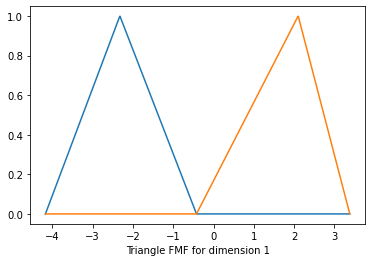

In [46]:
# Enter code for Question 10 here
# get range to plot
# Method 1: Using Eculidean distance
d1_max = np.max(dataset[:,0])
d1_min = np.min(dataset[:,0])

# sort nweights by d1 for order
nweights = nweights[nweights[:, 0].argsort()]

# get center of triangular fmf from nweights
b = nweights[:,0]

# get number of clusters
n_fmf = len(nweights)

# cluster index using euclidean distance from nweights
e_dist = np.zeros((len(dataset), n_fmf))
for i in range(len(dataset)):
    for j in range(n_fmf):
        e_dist[i,j] = np.sqrt(((dataset[i,:] - nweights[j,:])**2).sum())
cluster_index = np.argmin(e_dist, axis=1)

# Calculate the cluster index using Euclidean distance from nweights #metod 2
e_dist1 = np.linalg.norm(dataset[:, np.newaxis] - nweights, axis=2)
cluster_index1 = np.argmin(e_dist, axis=1)

# Initialize arrays to store parameters for each membership function
a = np.zeros(n_fmf)
c = np.zeros(n_fmf)
fmf = np.zeros((n_fmf,1001))

# repeat, for each cluster i,
for i in range(n_fmf):
    # get index of samples which belong to cluster i
    dataset_index = np.where(cluster_index==i)
    value = np.zeros(len(dataset_index[0]))
    
    # get a list of the samples' d1 values
    for j in range(len(dataset_index[0])):
        value[j] = dataset[dataset_index[0][j],0]
    
    # set a[i] and c[i] to be the min and max value from the cluster i
    a[i] = min(value)
    c[i] = max(value)
    
# Set parameters for each triangular FMF and Plot the triangular FMFs
x = np.linspace(d1_min, d1_max, 1001)
for i in range(n_fmf):
    if (i==0):
        c[i] = (a[i+1] + c[i]) / 2
    elif (i!=(n_fmf-1)):
        a[i] = c[i-1]
        c[i] = (a[i+1] + c[i]) / 2
    else:
        a[i] = c[i-1]
    fmf[i] = fz.trimf(x, [a[i], b[i], c[i]])
    plt.plot(x, fmf[i])

plt.xlabel('Triangle FMF for dimension 1')
plt.show()


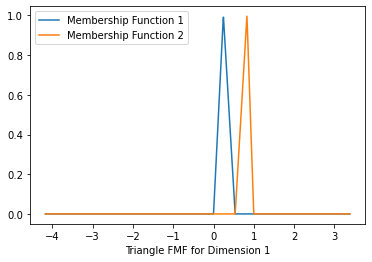

In [44]:
#Method 2 :convexity by adjusting b_values
# Sort nweights by d1 for order
nweights = nweights[nweights[:, 0].argsort()]

# Initialize arrays to store parameters for each membership function
a_values = np.zeros(len(nweights))
b_values = nweights[:, 0]
c_values = np.zeros(len(nweights))

# Set parameters for each triangular FMF to satisfy coverage, normalization, convexity, and order
for i in range(len(nweights)):
    if i == 0:
        a_values[i] = d1_min
        c_values[i] = (nweights[i, 0] + nweights[i+1, 0]) / 2
    elif i == len(nweights) - 1:
        a_values[i] = (nweights[i-1, 0] + nweights[i, 0]) / 2
        c_values[i] = d1_max
    else:
        a_values[i] = (nweights[i-1, 0] + nweights[i, 0]) / 2
        c_values[i] = (nweights[i, 0] + nweights[i+1, 0]) / 2

# Ensure convexity by adjusting b_values
for i in range(1, len(nweights) - 1):
    b_values[i] = (a_values[i] + c_values[i]) / 2

# Normalize the parameters
a_values = (a_values - d1_min) / (d1_max - d1_min)
b_values = (b_values - d1_min) / (d1_max - d1_min)
c_values = (c_values - d1_min) / (d1_max - d1_min)

# Plot the modified triangular FMFs
x = np.linspace(d1_min, d1_max, 1001)
for i in range(len(nweights)):
    fmf = np.maximum(0, np.minimum((x - a_values[i]) / (b_values[i] - a_values[i]),
                                  (c_values[i] - x) / (c_values[i] - b_values[i])))
    plt.plot(x, fmf, label=f'Membership Function {i + 1}')

plt.xlabel('Triangle FMF for Dimension 1')
plt.legend()
plt.show()